In [1]:
import numpy as np
import matplotlib.pyplot as plt
import config
import mysql.connector
from mysql.connector import errorcode
import time
from datetime import date,datetime,timedelta
import random
%matplotlib inline

In [2]:
def connect_to_AWS():
    cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        passwd = config.password
    )
    return cnx

def close_connections():
    cursor.close()
    conn.close()

In [3]:
conn = connect_to_AWS()
cursor = conn.cursor()

In [4]:
db_name = "Movies"
try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        conn.database = db_name
    else:
        print(err)
        exit(1)

In [178]:
cursor.execute("""SELECT DISTINCT movieGenre FROM movies;""")
genres_test = cursor.fetchall()
genres_test = [genre[0] for genre in genres_test]
good_data = dict.fromkeys(genres_test,[])
even_data = dict.fromkeys(genres_test,[])
bad_data = dict.fromkeys(genres_test,[])

for some in genres_test:
    query = f"""SELECT movieBudget,movieIntGross+movieDomGross FROM movies WHERE movieGenre = '{some}' AND 3*movieBudget<=(movieIntGross+movieDomGross);"""
    cursor.execute(query)
    temp = cursor.fetchall()
    good_data[some] = temp
    query = f"""SELECT movieBudget,movieIntGross+movieDomGross FROM movies WHERE movieGenre = '{some}' AND 3*movieBudget>=(movieIntGross+movieDomGross) AND movieBudget<=(movieIntGross+movieDomGross);"""
    cursor.execute(query)
    temp = cursor.fetchall()
    even_data[some] = temp
    query = f"""SELECT movieBudget,movieIntGross+movieDomGross FROM movies WHERE movieGenre = '{some}' AND movieBudget>=(movieIntGross+movieDomGross);"""
    cursor.execute(query)
    temp = cursor.fetchall()
    bad_data[some] = temp

In [182]:
def get_percent(num,total):
    return str(round((num/total)*100,2))+'%'

for some in genres_test:
    all_points = len(good_data[some]+even_data[some]+bad_data[some])
#     print(some+' data:')
#     print('good:',get_percent(len(good_data[some]),all_points),
#           'even:',get_percent(len(even_data[some]),all_points),
#           'bad:',get_percent(len(bad_data[some]),all_points))
    print(some,'good:',get_percent(len(good_data[some]),all_points))
    print(some,'bad:',get_percent(len(even_data[some]+bad_data[some]),all_points))
    print(some,'total points:',all_points)

Action good: 60.14%
Action bad: 39.86%
Action total points: 276
Adventure good: 63.98%
Adventure bad: 36.02%
Adventure total points: 322
Western good: 28.57%
Western bad: 71.43%
Western total points: 7
Musical good: 75.0%
Musical bad: 25.0%
Musical total points: 16
Thriller/Suspense good: 59.72%
Thriller/Suspense bad: 40.28%
Thriller/Suspense total points: 72
Drama good: 40.59%
Drama bad: 59.41%
Drama total points: 101
Comedy good: 53.33%
Comedy bad: 46.67%
Comedy total points: 75
Horror good: 58.33%
Horror bad: 41.67%
Horror total points: 12
Black Comedy good: 33.33%
Black Comedy bad: 66.67%
Black Comedy total points: 3
Romantic Comedy good: 70.0%
Romantic Comedy bad: 30.0%
Romantic Comedy total points: 20
Documentary good: 50.0%
Documentary bad: 50.0%
Documentary total points: 2


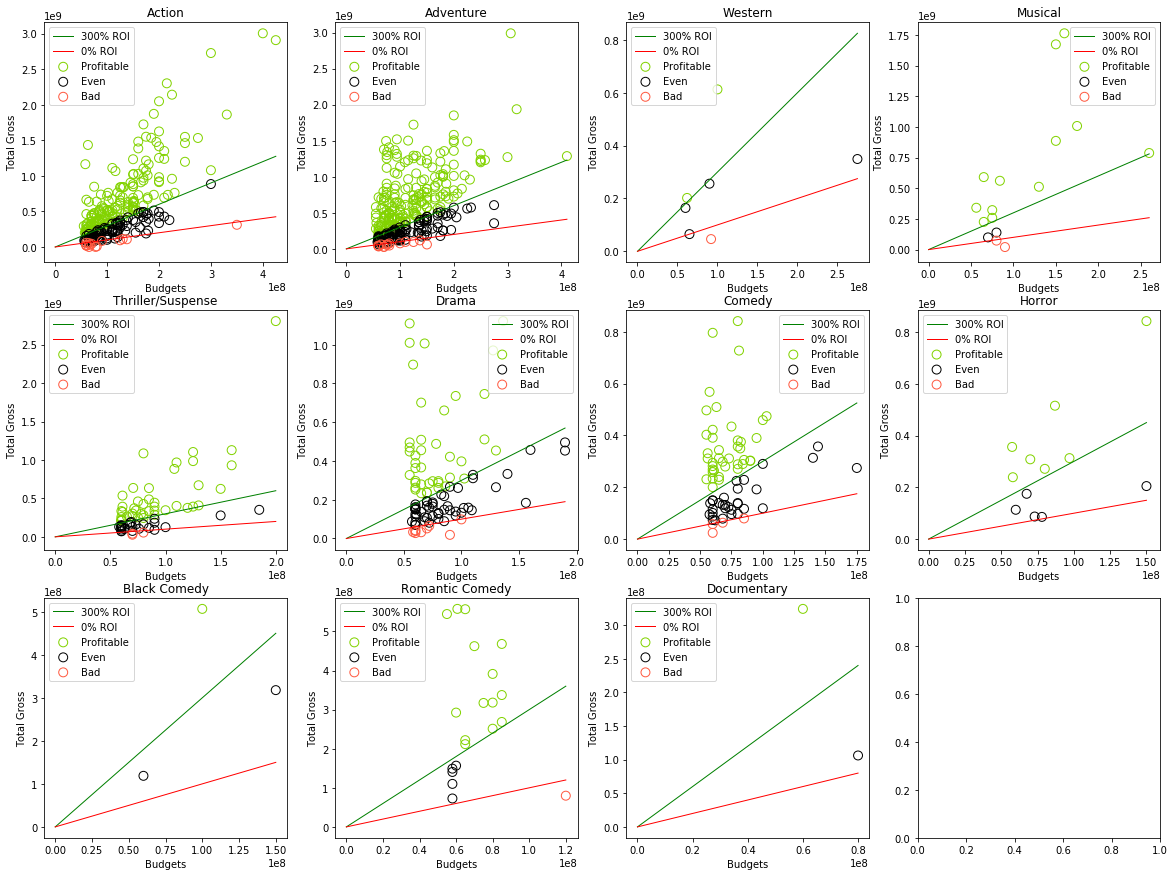

In [180]:
# cursor.execute("""SELECT movieGenre FROM movies ORDER BY (movieDomGross+movieIntGross-movieBudget) DESC;""")
# genres = cursor.fetchall()
# cursor.execute("""SELECT movieBudget FROM movies ORDER BY (movieDomGross+movieIntGross-movieBudget) DESC;""")
# budgets = cursor.fetchall()
# cursor.execute("""SELECT (movieDomGross+movieIntGross) FROM movies ORDER BY  (movieDomGross+movieIntGross-movieBudget) DESC;""")
# profits = cursor.fetchall()

fig, ax = plt.subplots(3,4,figsize = (20,15))
for i in range(len(genres_test)):
    genre = genres_test[i]
    curr_ax = ax[i//4][i%4]
#     ax.scatter(x=[boi[0] for boi in data[genre]],y=[gurl[0] for gurl in data[genre]],facecolors = None,edgecolors = colors[genre],s=80,label = genre)
    good_x = [x[0] for x in good_data[genre]]
    good_y = [y[1] for y in good_data[genre]]
    even_x = [x[0] for x in even_data[genre]]
    even_y = [y[1] for y in even_data[genre]]
    bad_x = [x[0] for x in bad_data[genre]]
    bad_y = [y[1] for y in bad_data[genre]]
    x = max(good_x+even_x+bad_x)
    y = max(good_y+even_y+bad_y)
    c = min(x,y)
    d = max(x,y)
    curr_ax.scatter(good_x,good_y,edgecolors = "#82d300",facecolors = 'none',label = 'Profitable',s=80,linewidth=1)
    curr_ax.scatter(even_x,even_y,edgecolors = "black",facecolors='none',label = 'Even',s=80,linewidth=1)
    curr_ax.scatter(bad_x,bad_y,edgecolors = "#ff5a41",facecolors='none',label = 'Bad',s=80,linewidth=1)
    curr_ax.plot([0,c],[0,3*c],color='green',linewidth=1,label = '300% ROI')
    curr_ax.plot([0,c],[0,c],color='red',linewidth=1,label='0% ROI')
    curr_ax.axis('tight')
    curr_ax.set_title(genre)
    curr_ax.set_xlabel('Budgets')
    curr_ax.set_ylabel('Total Gross')
    curr_ax.legend()
    curr_ax.axis('tight')
# ax.axis([0,300000000,0,350000000])
# fig.set_title('Movie Budgets/Gross by Genre')
# ax.set_xlabel('Budgets')
# ax.set_ylabel('Total Gross')
# ax.legend()
plt.show()

In [243]:
query = """SELECT movieReleaseDate,movieDomGross,movieIntGross FROM movies ORDER BY movieReleaseDate DESC;"""
cursor.execute(query)
all_line_data = cursor.fetchall()
all_line_data


[(datetime.date(2019, 7, 26), 45718397, 45718397),
 (datetime.date(2019, 7, 2), 346500256, 1039485468),
 (datetime.date(2019, 6, 14), 78875053, 250410481),
 (datetime.date(2019, 6, 7), 65609445, 246300941),
 (datetime.date(2019, 6, 7), 153918300, 331990024),
 (datetime.date(2019, 5, 31), 109968931, 382768708),
 (datetime.date(2019, 5, 24), 346636294, 1009887888),
 (datetime.date(2019, 5, 10), 143858720, 429810807),
 (datetime.date(2019, 4, 26), 856706929, 2147483647),
 (datetime.date(2019, 4, 5), 140371656, 363664533),
 (datetime.date(2019, 3, 29), 114740069, 344942385),
 (datetime.date(2019, 3, 15), 45216793, 115130648),
 (datetime.date(2019, 3, 8), 426829839, 1123365437),
 (datetime.date(2019, 2, 22), 160799505, 519246496),
 (datetime.date(2019, 2, 14), 85710210, 402971268),
 (datetime.date(2019, 2, 8), 105806508, 190209817),
 (datetime.date(2019, 2, 8), 32138862, 62599159),
 (datetime.date(2019, 1, 25), 16790790, 28296983),
 (datetime.date(2019, 1, 22), 0, 1521672),
 (datetime.date(

In [279]:
release_years = list(set([date[0].year for date in all_line_data]))
domestic_gross = dict.fromkeys(release_years,0)
international_gross = dict.fromkeys(release_years,0)
for data in all_line_data:
    year = data[0].year
    if year != 2019:
#         print(year)
        domestic_gross[year] += data[1]
        international_gross[year] += data[2]
domestic_gross = [domestic_gross[year]/10**5 for year in release_years]
international_gross = [international_gross[year]/10**5 for year in release_years]
# dom_perc = [domestic_gross[i]/totals[i] for i in range(len(totals)-1)]
# int_perc = [international_gross[i]/totals[i] for i in range(len(totals)-1)]
domestic_gross

[1342.18018,
 1541.12492,
 542.43125,
 1999.94611,
 3231.18928,
 1628.33635,
 4457.24699,
 10202.31488,
 10608.96,
 16736.165,
 23592.21398,
 21047.68955,
 24761.50127,
 32661.71884,
 36818.39589,
 43517.40454,
 45998.27406,
 43904.3787,
 40937.42563,
 41746.09726,
 50664.09487,
 51458.08498,
 57527.35509,
 61685.27968,
 54340.45696,
 66092.02356,
 66722.78848,
 61220.01721,
 71029.83154,
 72162.15787,
 70581.82811,
 68920.17739,
 0.0]

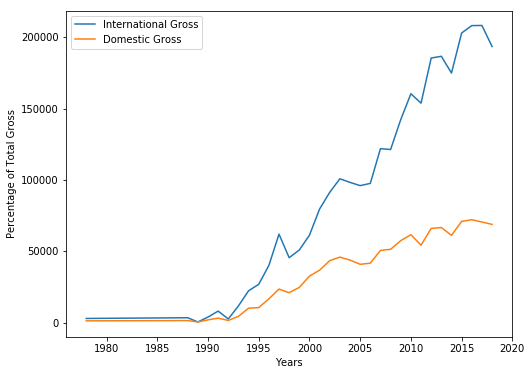

In [281]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(release_years[:-1],international_gross[:-1], label = "International Gross")
ax.plot(release_years[:-1],domestic_gross[:-1], label = 'Domestic Gross')
ax.axis('tight')
ax.set_xlabel('Years')
ax.set_ylabel('Percentage of Total Gross')
ax.legend()
plt.show()

In [120]:
close_connections()